In [1]:
import geopandas

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


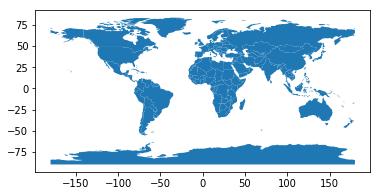

In [5]:
world.plot()

In [6]:
world.geometry.name

'geometry'

In [9]:
world = world.rename(columns={'geometry':'borders'}).set_geometry('borders')

In [10]:
world.geometry.name

'borders'

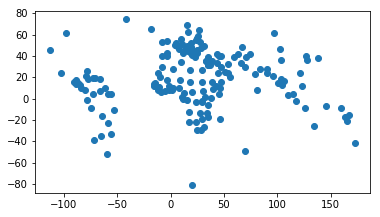

In [12]:
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')
world.plot()

### Formats to export data

In [13]:
import fiona; fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

### Plot southern hemisphere

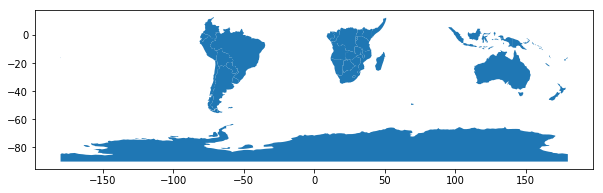

In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
southern = world.cx[:,:0]
southern.plot(figsize=(10,13))

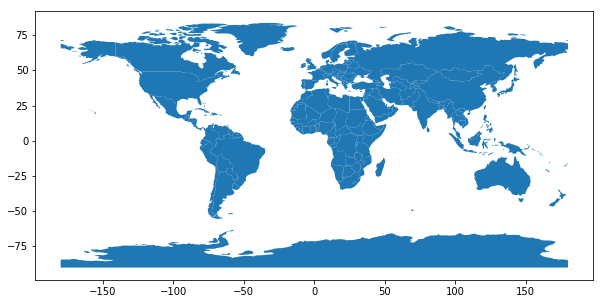

In [50]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
northern = world.cx[:,:]
northern.plot(figsize=(10,13))

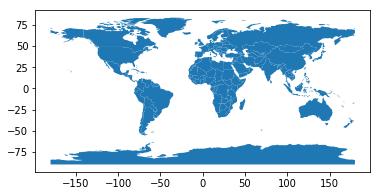

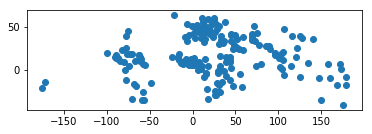

In [53]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.plot()
cities.plot()

### Cloropleth maps

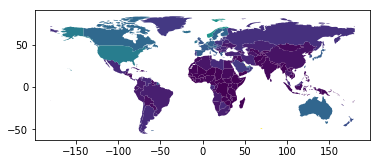

In [54]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

### Modify colors

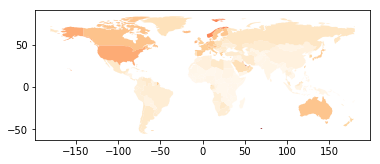

In [55]:
world.plot(column='gdp_per_cap', cmap='OrRd');

* The way color maps are scaled can also be manipulated with the scheme option (if you have pysal installed, which can be accomplished via conda install pysal). The scheme option can be set to ‘equal_interval’, ‘quantiles’ or ‘percentiles’. See the PySAL documentation for further details about these map classification schemes.

### Cloropeth with Pysal

In [97]:
from legendgram import legendgram 
import geopandas as gpd
import pysal as ps
import matplotlib.pyplot as plt
import numpy as np
import palettable.matplotlib as mplpal
import esda
%matplotlib inline

In [98]:
gdf = gpd.read_file(ps.lib.examples.get_path('NAT.shp'))
gdf.crs = {'init':'epsg:4269'}
gdf = gdf.to_crs(epsg=5070)

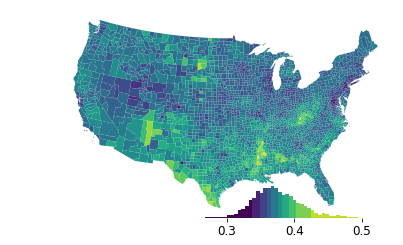

In [108]:
ax = gdf.plot("GI89")
ax.axis('off')
legendgram(plt.gcf(), # grab the figure, we need it
           ax, # the axis to add the legend
           gdf.GI89, # the attribute to map
           np.percentile(gdf.GI89, np.arange(10,110,10)), # the breaks to induce color differences on
           mplpal.Viridis_10, # the palette to use,
           legend_size=(.6,.16), # the size of the subplot, in fractions of the original axis
           loc= 'lower right' # the location on the axis
          )